In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
#Loading the dataset.
data = pd.read_csv('Mall_Customers.csv')

#Checking the first five ros from the dataset. 
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [24]:
#Inspecting the dataset to understand the features. 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [25]:
#Checking the datatypes of the columns. 
print(data.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [26]:
#Selecting the relevant features for clustering. 
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [27]:
#Checking for the missing values. 
print(features.isnull().sum())

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [28]:
#Scaling the features by using the StandardScaler. 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [29]:
#Using the optional method to find the optimal number of clusters. 
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

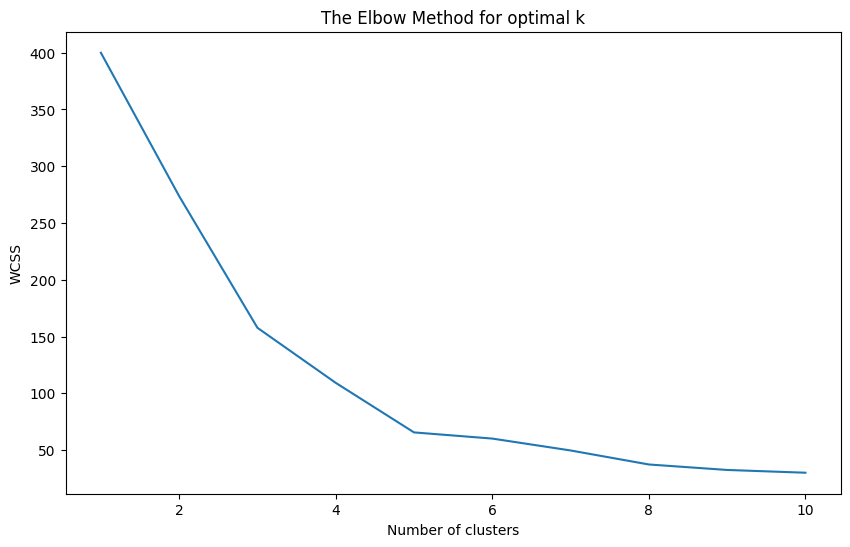

In [30]:
#Plotting the elbow graph. And determining the optimal number of clusters. 
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
#Fitting the K-means model with the choosen number of clusters. 
optimal_clusters = 5
kmeans = KMeans(n_clusters = optimal_clusters, random_state = 42)
clusters = kmeans.fit_predict(scaled_features)

In [32]:
#Adding the cluster labels to the original dataset. 
data['Cluster'] = clusters 

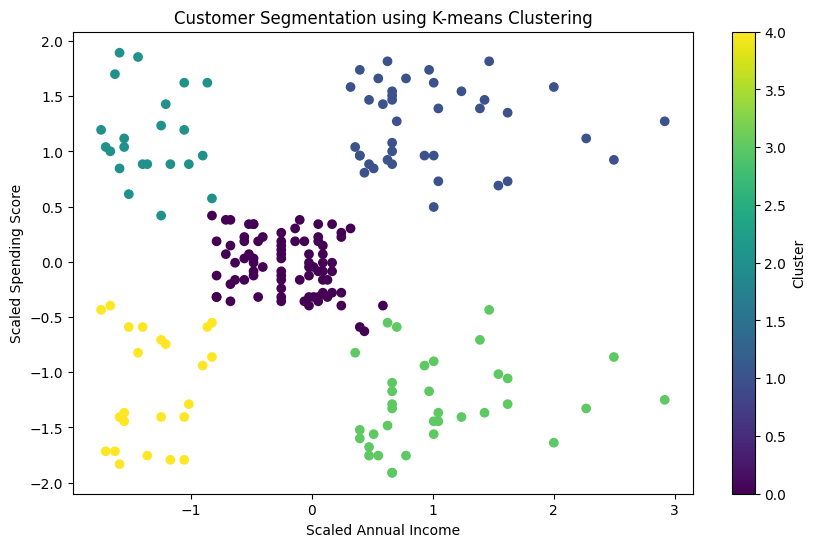

In [33]:
#Visualizing the clusters by using the scatter plot. 
plt.figure(figsize = (10, 6)) 
plt.scatter(scaled_features[:, 0],
            scaled_features[:, 1], 
            c = clusters, 
            cmap = 'viridis')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.colorbar(label = 'Cluster')
plt.show()

In [34]:
#Grouping the original data by clusters labels and computing mean for numeric columns. 
cluster_summary = data.groupby('Cluster').mean(numeric_only = True)

In [35]:
#Getting the mode for 'Gender' for each cluster. 
gender_summary = data.groupby('Cluster')['Gender'].agg(lambda x : x.mode()[0])

In [36]:
#Combining both the summaries in one DataFrame. 
summary = cluster_summary.join(gender_summary)

In [37]:
#Displaying the summary. 
print(summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         86.320988  42.716049           55.296296               49.518519   
1        162.000000  32.692308           86.538462               82.128205   
2         23.090909  25.272727           25.727273               79.363636   
3        164.371429  41.114286           88.200000               17.114286   
4         23.000000  45.217391           26.304348               20.913043   

         Gender  
Cluster          
0        Female  
1        Female  
2        Female  
3          Male  
4        Female  
